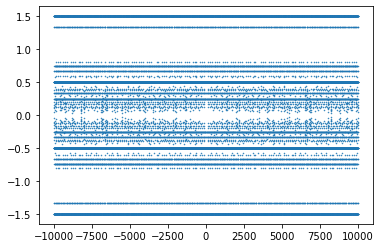

(-9309.5, -1.5)

In [203]:
from primePy import primes
from matplotlib import pyplot as plt
import math
import numpy as np


#Returns the prime factorization of any integer as a dictionary
def prime_factorization(n):
    n_d = {}
    n_f = primes.factors(n)
    for i in n_f:
        if i not in n_d:
            n_d[i] = 1
        else:
            n_d[i] += 1

    return n_d

#Definition of f_n from the paper
def f_n(k,n,n_d):
    if k < 0:
        k = -1*k
    k_d = prime_factorization(k)
    for p in k_d.items():
        if p[0] in n_d:
            if n > 2:
                k_d[p[0]] = min(math.floor(p[1]/(n-2)),math.floor((p[1] + n_d[p[0]])/(n-1))) #h_n 
            else:
                k_d[p[0]] = math.floor((p[1] + n_d[p[0]])/(n-1))
        else:
            k_d[p[0]] = math.floor(p[1]/(n-1)) #g_n
        
        
    return k_d

#Takes a prime factorization and returns the integer
def compute(n_d):
    n = 1
    for p in n_d.items():
        n *= p[0]**p[1]

    return n

def generate_solutions(n, n_d, max_k, max_t):
    result = []
    point = []
    x = []
    y = []
    k_range = list(range(max_k * -1, max_k + 1))
    t_range = list(range(max_t * -1, max_t + 1))
    del k_range[max_k] #remove 0
    del t_range[max_t] #remove 0
    
    for k in k_range:
        f_k = compute(f_n(k,n,n_d))
        for t in t_range:
            if math.gcd(t, f_k) < f_k:
                x.append(t/f_k + k)
                y.append(t/f_k)
                point.append((t/f_k + k, t/f_k))
    
    result = [x,y,point]
    return result
    
    

n = 4 #set your n parameter
max_k = 10000 #set your k parameter
max_t = 4 #set your t parameter

#calculate points
points = generate_solutions(n,prime_factorization(n),max_k,max_t)

#plot
plt.scatter(points[0],points[1],marker='.',s=1)
plt.show()

#show specific points
points[2][1000]



